In [ ]:
pip install boto3

IMAGE EDITING 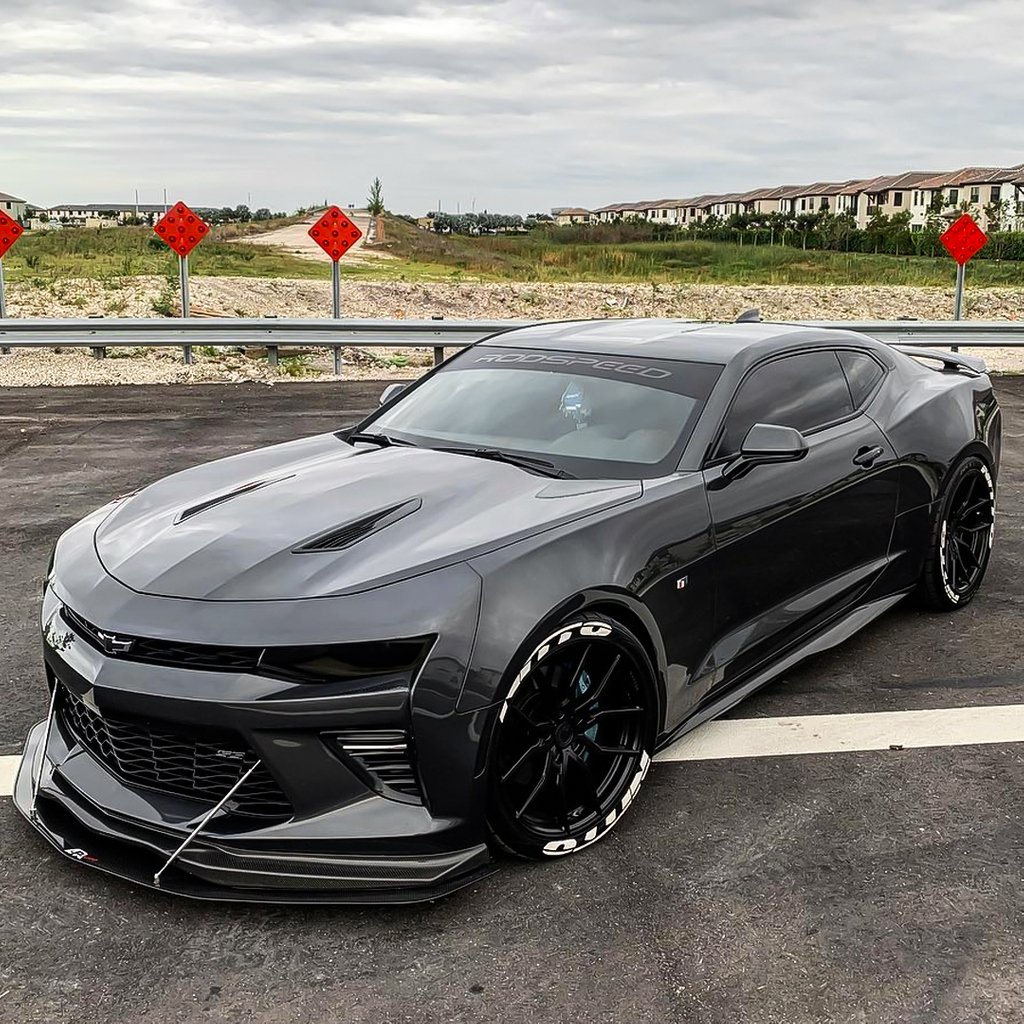

In [111]:
import boto3
import json

bedrock = boto3.client('bedrock-runtime')

# ImageGenerationConfig Options:
#   numberOfImages: Number of images to be generated
#   quality: Quality of generated images, can be standard or premium
#   height: Height of output image(s)
#   width: Width of output image(s)
#   cfgScale: Scale for classifier-free guidance
#   seed: The seed to use for reproducibility

with open("/content/sample_data/black_camaro.jpg", "rb") as image_file:
    input_image = base64.b64encode(image_file.read()).decode('utf8')

body = json.dumps(
    {
        "taskType":"INPAINTING",
        "inPaintingParams": {
            "text":"Make the clouds into a sunny blue sky",
            "image":input_image,
            "maskPrompt":"sky over the original car"
            },
        "imageGenerationConfig": {
            "numberOfImages":1,
            "quality":"premium"
            }
        }
    )
# body = json.dumps(
#     {
#         "taskType": "EDIT",
#         "textToImageParams": {
#             "text": "a green iguana",   # Required
# #           "negativeText": "<text>"  # Optional
#         },
#         "imageGenerationConfig": {
#             "numberOfImages": 1,   # Range: 1 to 5
#             "quality": "premium",  # Options: standard or premium
#             "height": 768,         # Supported height list in the docs
#             "width": 1280,         # Supported width list in the docs
#             "cfgScale": 7.5,       # Range: 1.0 (exclusive) to 10.0
#             "seed": 40             # Range: 0 to 214783647
#         }
#     }
# )

In [112]:
response = bedrock.invoke_model(
    body=body,
    modelId="amazon.titan-image-generator-v1" ,
    accept="application/json",
    contentType="application/json"
)

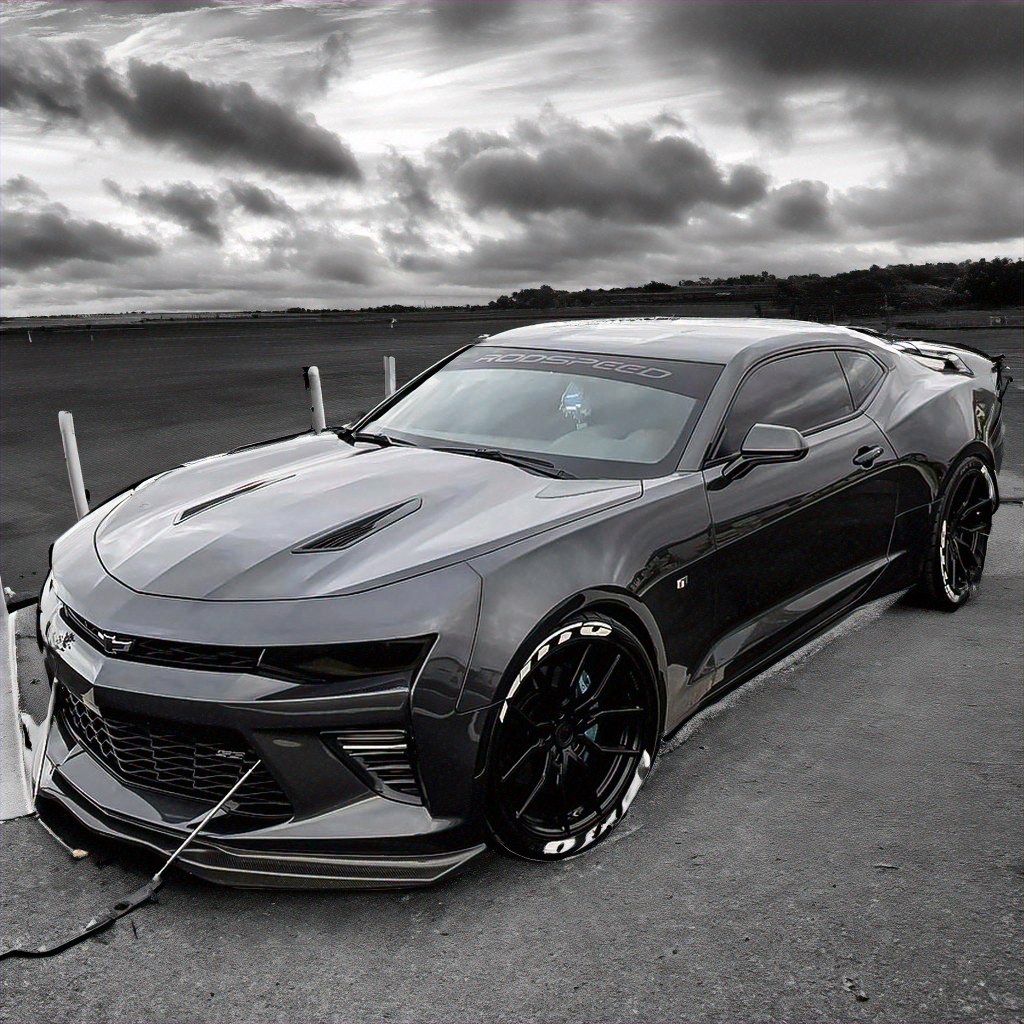

In [113]:
import base64
from PIL import Image
from io import BytesIO

response_body = json.loads(response.get("body").read())
images = [Image.open(BytesIO(base64.b64decode(base64_image))) for base64_image in response_body.get("images")]

for img in images:
    display(img)

MULTIMODAL EMBEDDINGS
 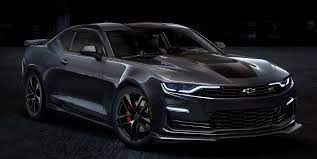

In [70]:
# read in image and create embeddings for image and caption
with open("/content/sample_data/camaro.jfif", "rb") as image_file:
    input_image = base64.b64encode(image_file.read()).decode('utf8')


body = json.dumps(
    {
        "inputText": "Gray sports car",
        "inputImage": input_image
    }
)

In [71]:
response = bedrock.invoke_model(
	body=body,
	modelId="amazon.titan-embed-image-v1",
	accept="application/json",
	contentType="application/json"
)

In [72]:
response_body = json.loads(response.get("body").read())
car_embedding = response_body.get("embedding")
car_embedding[:2]

[0.0069486527, 0.026003001]

In [73]:
# Vector embedding of similar caption
body = json.dumps(
    {
        "inputText": "gray sports car",
    }
)

In [74]:
response = bedrock.invoke_model(
	body=body,
	modelId="amazon.titan-embed-image-v1",
	accept="application/json",
	contentType="application/json"
)

In [75]:
response_body = json.loads(response.get("body").read())
text_embedding = response_body.get("embedding")
text_embedding[:2]

[0.01184082, 0.011474609]

In [82]:
# Calculate cosine similarity on text vs image/caption embeddings
import numpy as np

dot_product = np.dot(np.array(car_embedding), np.array(text_embedding))
norm_vector1 = np.linalg.norm(car_embedding)
norm_vector2 = np.linalg.norm(text_embedding)
cosine_similarity_value = dot_product / (norm_vector1 * norm_vector2)
print(f'Cosine similarity is {cosine_similarity_value}')

Cosine similarity is 0.8001255952292969


In [81]:
np.array(car_embedding).shape

(1024,)